# Waze Project (Improve user retention)

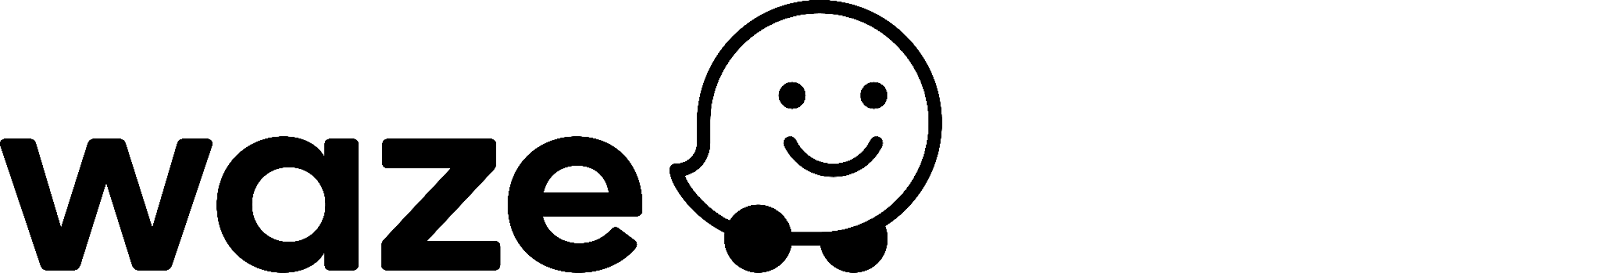

### **Project goal:**

Waze leadership has asked your data team to develop a machine learning model to predict user churn. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn. An accurate model will help prevent churn, improve user retention, and grow Waze’s business.

### **Background:**

Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer.

**This project will be divided into smaller projects or tasks to achieve the main goal.**

# **Inspect and analyze data**


We want to ensure the information is,

1. Ready to answer questions and yield insights

2. Ready for visualizations

3. Ready for future hypothesis testing and statistical methods

**The purpose** of this project is to investigate and understand the data provided.

**The goal** is to use a dataframe contructed within Python, perform a cursory inspection of the provided dataset, and inform team members of your findings.

This activity has three parts:

**Part 1:** Understand the situation

* How can you best prepare to understand and organize the provided information?

**Part 2:** Understand the data

* Create a pandas dataframe for data learning, future exploratory data analysis (EDA), and statistical activities

* Compile summary information about the data to inform next steps

**Part 3:** Understand the variables

* Use insights from your examination of the summary data to guide deeper investigation into variables


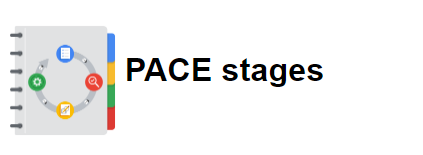

The following notebook components are labeled with the respective **PACE stage: Plan, Analyze, Construct, and Execute**.

## **PACE: Plan**

### **Understand the situation**

*   How can you best prepare to understand and organize the provided driver data?


*Begin by exploring your dataset and consider reviewing the Data Dictionary.*

**Answer:**

Prepare by reading in the data, viewing the data dictionary, and exploring the dataset to identify key variables for the stakeholder.

## **PACE: Analyze**

### **1. Imports and data loading**

Start by importing the packages that you will need to load and explore the dataset.

In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Then, load the dataset into a dataframe. Creating a dataframe will help you conduct data manipulation, exploratory data analysis (EDA), and statistical activities

In [2]:
# Load dataset into dataframe
dataset = pd.read_csv("/kaggle/input/waze-synthetic-user-churn-data/waze_dataset.csv")

In [3]:
# Show the number of rows and columns (rows, columns)
dataset.shape 

(14999, 13)

### **2. Summary information**

View and inspect summary information about the dataframe.

Consider the following questions:

1. When reviewing the `df.head()` output, are there any variables that have missing values?

2. When reviewing the `df.info()` output, what are the data types? How many rows and columns do you have?

3. Does the dataset have any missing values?

In [4]:
dataset.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


**The dataset has 700 missing values in the `label` column.**

### **3. Null values and summary statistics**

Compare the summary statistics of the 700 rows that are missing labels with summary statistics of the rows that are not missing any values.

**Question:** Is there a discernible difference between the two populations?

In [6]:
# Isolate rows with null values
dataset_wth_null = dataset[dataset['label'].isnull()]

# Display summary stats of rows with null values
dataset_wth_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [7]:
# Isolate rows without null values
dataset_wthout_null = dataset[~dataset['label'].isnull()]     # Not null

# Display summary stats of rows without null values
dataset_wthout_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


**Answer:**

> Comparing summary statistics of the observations with missing retention labels with those that aren't missing any values reveals nothing remarkable. The means and standard deviations are fairly consistent between the two groups.

### **4. Null values - device counts**


Next, check the two populations with respect to the `device` variable.

**Question:** How many iPhone users had null values and how many Android users had null values?

In [8]:
# Get count of null values by device

dataset_wth_null['device'].value_counts()

device
iPhone     447
Android    253
Name: count, dtype: int64

**Answer:**
> Of the 700 rows with null values, 447 were iPhone users and 253 were Android users.

Now, of the rows with null values, calculate the percentage with each device—Android and iPhone. You can do this directly with the `value_counts()` function.

In [9]:
# Calculate % of iPhone nulls and Android nulls
dataset_wth_null['device'].value_counts(normalize=True)

device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

How does this compare to the device ratio in the full dataset?

In [10]:
# Calculate % of iPhone users and Android users in full dataset
dataset['device'].value_counts(normalize=True)

device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64

The percentage of missing values by each device is consistent with their representation in the data overall.

There is nothing to suggest a non-random cause of the missing data.

Examine the counts and percentages of users who churned vs. those who were retained. How many of each group are represented in the data?

In [11]:
# Calculate counts of churned vs. retained

print(dataset['label'].value_counts())
print()
print(dataset['label'].value_counts(normalize=True))

label
retained    11763
churned      2536
Name: count, dtype: int64

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


This dataset contains 82% retained users and 18% churned users.

Next, compare the medians of each variable for churned and retained users. The reason for calculating the median and not the mean is that you don't want outliers to unduly affect the portrayal of a typical user. Notice, for example, that the maximum value in the `driven_km_drives` column is 21,183 km. That's more than half the circumference of the earth!

In [12]:
# Calculate median values of all columns for churned and retained users

dataset.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


This offers an interesting snapshot of the two groups, churned vs. retained:

Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile. Continue exploring!

Calculate the median kilometers per drive in the last month for both retained and churned users.

Begin by dividing the `driven_km_drives` column by the `drives` column. Then, group the results by churned/retained and calculate the median km/drive of each group.

In [13]:
# Add a column to dataset called `km_per_drive`
dataset['km_per_drive'] = dataset['driven_km_drives'] / dataset['drives']

# Group by `label`, calculate the median, and isolate for km per drive
median_km_per_drive = dataset.groupby('label').median(numeric_only=True)[['km_per_drive']]
median_km_per_drive

,km_per_drive
label,
churned,74.109416
retained,75.014702


The median retained user drove about one more kilometer per drive than the median churned user. How many kilometers per driving day was this?

To calculate this statistic, repeat the steps above using `driving_days` instead of `drives`.

In [14]:
# Add a column to df called `km_per_driving_day`
dataset['km_per_driving_day'] = dataset['driven_km_drives'] / dataset['driving_days']

# Group by `label`, calculate the median, and isolate for km per driving day
median_km_per_driving_day = dataset.groupby('label').median(numeric_only=True)[['km_per_driving_day']]
median_km_per_driving_day

,km_per_driving_day
label,
churned,697.541999
retained,289.549333


Now, calculate the median number of drives per driving day for each group.

In [15]:
# Add a column to df called `drives_per_driving_day`
dataset['drives_per_driving_day'] = dataset['drives'] / dataset['driving_days']

# Group by `label`, calculate the median, and isolate for drives per driving day
median_drives_per_driving_day = dataset.groupby('label').median(numeric_only=True)[['drives_per_driving_day']]
median_drives_per_driving_day

,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


The median user who churned drove 698 kilometers each day they drove last month, which is almost ~240% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data—and in particular the sample of churned users—contains a high proportion of long-haul truckers.

In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

Finally, examine whether there is an imbalance in how many users churned by device type.

Begin by getting the overall counts of each device type for each group, churned and retained.

In [16]:
# For each label, calculate the number of Android users and iPhone users

dataset.groupby(['label', 'device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [17]:
# For each label, calculate the percentage of Android users and iPhone users
dataset.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

## **PACE: Construct**

## **PACE: Execute**